In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geodatasets 
import folium
import mapclassify
import numpy as np
from shapely.geometry import LineString
import contextily as cx
import pandas as pd
import rasterio
from rasterio.crs import CRS
from rasterio.plot import show
# !pip3 install rioxarray
# !pip3 install xarray
import rioxrray as rxr
import xarray as xr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.2 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'rioxrray'

GeoPandas has three basic classes of geometric objects (which are actually shapely objects):

Points / Multi-Points  
    - POINT (10.50000 45.50000)

Lines / Multi-Lines   
    - LineString([[0, 0], [1, 0], [1, 1]])

Polygons / Multi-Polygons  
    - POLYGON ((35.00000 35.00000, 42.00000 35.00000, 35.00000 35.00000))  

  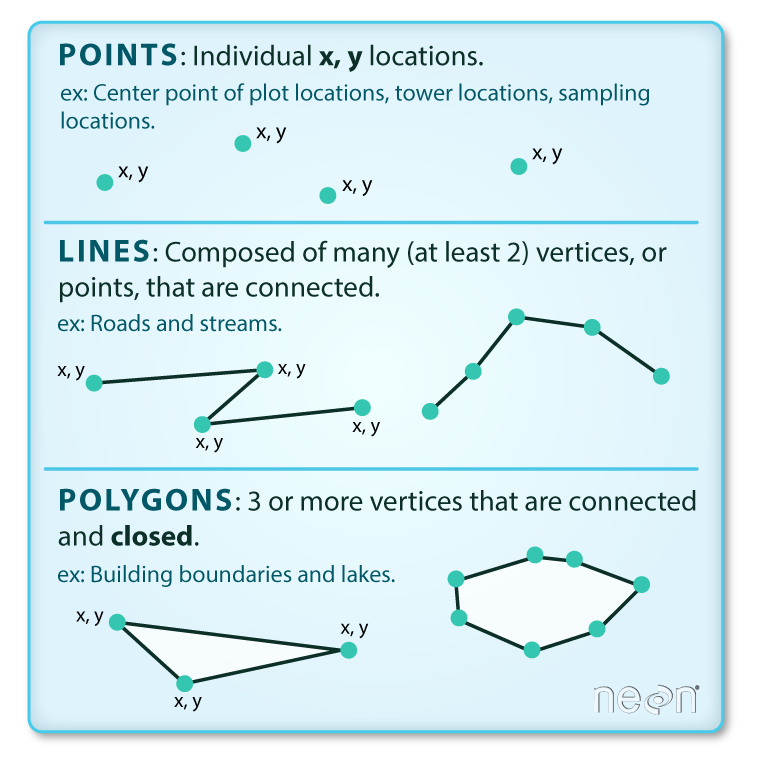

There is a repository on github which hosts a spatial data for tutorials. We will use some of the datasets from this database in today's class.
[GeoDa Data and Lab](https://geodacenter.github.io/data-and-lab/)

In [40]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [41]:
data = gpd.read_file(geodatasets.get_path('geoda.ndvi'))

In [42]:
data.head()
data.shape

(49, 8)

Normalized Difference Vegetation Index Grid: A subset of 7 by 7 square raster grids with 10 arcminute spacing roughly situated around the border between the Central African Republic, Sudan and Congo, drawn from the NOAA 1990 Global Change Database.

In [43]:
data.explore()

<Axes: >

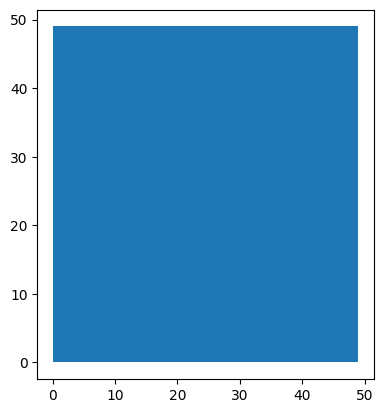

In [44]:
data.plot()

The most important property of a GeoDataFrame is that it always has one GeoSeries column and is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame, this commands will always act on the “geometry” column by default.

A GeoDataFrame may also contain other columns with geometrical (shapely) objects, but only one column can be the active geometry at a time. To change which column is the active geometry column, use the `GeoDataFrame.set_geometry()` method.

In [45]:
data=data.rename_geometry("boxes")

In [46]:
data.geometry.name

'boxes'

In [47]:
data['centroid_col']=data.centroid
data['centroid_col'].head()

C:\Users\jha16\AppData\Local\Temp\ipykernel_8808\3145540201.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['centroid_col']=data.centroid


0     POINT (3.50000 45.50000)
1    POINT (10.50000 45.50000)
2    POINT (17.50000 45.50000)
3    POINT (24.50000 45.50000)
4    POINT (31.50000 45.50000)
Name: centroid_col, dtype: geometry

<Axes: >

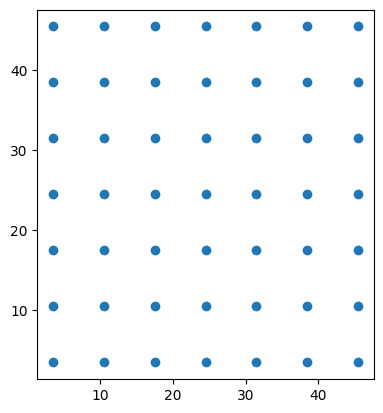

In [48]:
data=data.set_geometry('centroid_col')
data.plot()

`Example 1`: Lets look at the NDVI dataset grom the geodatasets. Could we analyze the temp gradient in the area this dataset was modelled for?

In [ ]:
data.sort_values("TEMP")

`Exercise 1`: Calculate the centroid points and sort them by elevation data. Then create a linestring using these sorted points and plot them colored by their elevation value.

In [50]:
data["linestring"]=np.nan
for ind, val in data.iterrows():
    try:
        print(data["centroid_col"][ind])
        data["linestring"][ind]=LineString([data["centroid_col"][ind],data["centroid_col"][ind+1]])
    except:
        data["linestring"][ind]=data["centroid_col"][ind]
        continue
    
data=data.set_geometry('linestring')
    

POINT (3.5 45.5)
POINT (10.5 45.5)
POINT (17.5 45.5)
POINT (24.5 45.5)
POINT (31.5 45.5)
POINT (38.5 45.5)
POINT (45.5 45.5)
POINT (3.5 38.5)
POINT (10.5 38.5)
POINT (17.5 38.5)
POINT (24.5 38.5)
POINT (31.5 38.5)
POINT (38.5 38.5)
POINT (45.5 38.5)
POINT (3.5 31.5)
POINT (10.5 31.5)
POINT (17.5 31.5)
POINT (24.5 31.5)
POINT (31.5 31.5)
POINT (38.5 31.5)
POINT (45.5 31.5)
POINT (3.5 24.5)
POINT (10.5 24.5)
POINT (17.5 24.5)
POINT (24.5 24.5)
POINT (31.5 24.5)
POINT (38.5 24.5)
POINT (45.5 24.5)
POINT (3.5 17.5)
POINT (10.5 17.5)
POINT (17.5 17.5)
POINT (24.5 17.5)
POINT (31.5 17.5)
POINT (38.5 17.5)
POINT (45.5 17.5)
POINT (3.5 10.5)
POINT (10.5 10.5)
POINT (17.5 10.5)
POINT (24.5 10.5)
POINT (31.5 10.5)
POINT (38.5 10.5)
POINT (45.5 10.5)
POINT (3.5 3.5)
POINT (10.5 3.5)
POINT (17.5 3.5)
POINT (24.5 3.5)
POINT (31.5 3.5)
POINT (38.5 3.5)
POINT (45.5 3.5)


C:\Users\jha16\AppData\Local\Temp\ipykernel_8808\223400208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["linestring"][ind]=LineString([data["centroid_col"][ind],data["centroid_col"][ind+1]])


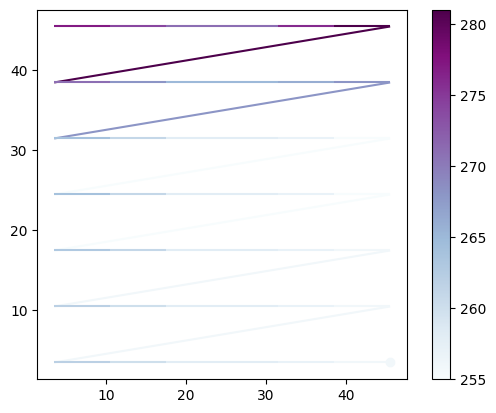

In [51]:

ax=data.plot(column="TEMP",cmap="BuPu", legend=True)



`Exercise 2`: Create a choropleth of population density using the **Lansing1** dataset from the geodatasets. Show the population-density plot using a relevant color scheme. You can choose the colorscheme as described [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).  
We have presented a list of colormaps supported by Matplotlib here for easy access but you can learn more details about them from the matplotlib colormaps page.
-   Sequential: change in lightness and often saturation of color incrementally, often using a single hue; should be used for representing information that has ordering.  

-   Diverging: change in lightness and possibly saturation of two different colors that meet in the middle at an unsaturated color; should be used when the information being plotted has a critical middle value, such as topography or when the data deviates around zero.  

-   Cyclic: change in lightness of two different colors that meet in the middle and beginning/end at an unsaturated color; should be used for values that wrap around at the endpoints, such as phase angle, wind direction, or time of day.  

-   Qualitative: often are miscellaneous colors; should be used to represent information which does not have ordering or relationships.  

In [52]:
data1 = gpd.read_file(geodatasets.get_path('geoda.lansing1'))
data1.head()

,FIPS,MSA,TOT_POP,POP_16,POP_65,WHITE,BLACK,ASIAN,HISP,MUTLI_RA,...,EMP_FEM,OCC_MAN,OCC_OFF1,OCC_INFO,HH_INC,POV_POP,POV_TOT,HSG_VAL,POLYID,geometry
0,26037010600,Lansing,2517,696,238,2455,0,6,41,10,...,508,151,141,17,49000,2511,153,97700,0,"MULTIPOLYGON (((-84.60068 43.11771, -84.60072 ..."
1,26037010702,Lansing,2329,561,336,2245,0,4,71,3,...,484,232,103,10,39968,2321,173,90900,1,"MULTIPOLYGON (((-84.36778 43.11791, -84.36775 ..."
2,26037010701,Lansing,2115,490,230,2072,0,0,31,12,...,487,172,136,7,53021,2111,70,124800,2,"MULTIPOLYGON (((-84.48348 43.11757, -84.48349 ..."
3,26037010500,Lansing,3497,974,372,3383,5,16,63,15,...,738,217,238,35,54647,3491,126,128600,3,"MULTIPOLYGON (((-84.60141 43.03134, -84.60148 ..."
4,26037010901,Lansing,2790,624,487,2641,0,5,107,16,...,542,149,199,21,52222,2418,124,118100,4,"MULTIPOLYGON (((-84.48409 43.03078, -84.48413 ..."


In [53]:
data1.explore()

In [54]:
data1["area"]=data1.area
data1.head()


C:\Users\jha16\AppData\Local\Temp\ipykernel_8808\3973490184.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data1["area"]=data1.area


,FIPS,MSA,TOT_POP,POP_16,POP_65,WHITE,BLACK,ASIAN,HISP,MUTLI_RA,...,OCC_MAN,OCC_OFF1,OCC_INFO,HH_INC,POV_POP,POV_TOT,HSG_VAL,POLYID,geometry,area
0,26037010600,Lansing,2517,696,238,2455,0,6,41,10,...,151,141,17,49000,2511,153,97700,0,"MULTIPOLYGON (((-84.60068 43.11771, -84.60072 ...",0.020326
1,26037010702,Lansing,2329,561,336,2245,0,4,71,3,...,232,103,10,39968,2321,173,90900,1,"MULTIPOLYGON (((-84.36778 43.11791, -84.36775 ...",0.010133
2,26037010701,Lansing,2115,490,230,2072,0,0,31,12,...,172,136,7,53021,2111,70,124800,2,"MULTIPOLYGON (((-84.48348 43.11757, -84.48349 ...",0.010156
3,26037010500,Lansing,3497,974,372,3383,5,16,63,15,...,217,238,35,54647,3491,126,128600,3,"MULTIPOLYGON (((-84.60141 43.03134, -84.60148 ...",0.020910
4,26037010901,Lansing,2790,624,487,2641,0,5,107,16,...,149,199,21,52222,2418,124,118100,4,"MULTIPOLYGON (((-84.48409 43.03078, -84.48413 ...",0.008628


In [55]:
data1["pop_density"]=data1["TOT_POP"]/data1["area"]
data1.head()

,FIPS,MSA,TOT_POP,POP_16,POP_65,WHITE,BLACK,ASIAN,HISP,MUTLI_RA,...,OCC_OFF1,OCC_INFO,HH_INC,POV_POP,POV_TOT,HSG_VAL,POLYID,geometry,area,pop_density
0,26037010600,Lansing,2517,696,238,2455,0,6,41,10,...,141,17,49000,2511,153,97700,0,"MULTIPOLYGON (((-84.60068 43.11771, -84.60072 ...",0.020326,123832.403077
1,26037010702,Lansing,2329,561,336,2245,0,4,71,3,...,103,10,39968,2321,173,90900,1,"MULTIPOLYGON (((-84.36778 43.11791, -84.36775 ...",0.010133,229842.802742
2,26037010701,Lansing,2115,490,230,2072,0,0,31,12,...,136,7,53021,2111,70,124800,2,"MULTIPOLYGON (((-84.48348 43.11757, -84.48349 ...",0.010156,208249.562854
3,26037010500,Lansing,3497,974,372,3383,5,16,63,15,...,238,35,54647,3491,126,128600,3,"MULTIPOLYGON (((-84.60141 43.03134, -84.60148 ...",0.020910,167236.906063
4,26037010901,Lansing,2790,624,487,2641,0,5,107,16,...,199,21,52222,2418,124,118100,4,"MULTIPOLYGON (((-84.48409 43.03078, -84.48413 ...",0.008628,323377.062558


In [56]:
data1=data1.sort_values("pop_density")
data1.head()

,FIPS,MSA,TOT_POP,POP_16,POP_65,WHITE,BLACK,ASIAN,HISP,MUTLI_RA,...,OCC_OFF1,OCC_INFO,HH_INC,POV_POP,POV_TOT,HSG_VAL,POLYID,geometry,area,pop_density
0,26037010600,Lansing,2517,696,238,2455,0,6,41,10,...,141,17,49000,2511,153,97700,0,"MULTIPOLYGON (((-84.60068 43.11771, -84.60072 ...",0.020326,123832.403077
3,26037010500,Lansing,3497,974,372,3383,5,16,63,15,...,238,35,54647,3491,126,128600,3,"MULTIPOLYGON (((-84.60141 43.03134, -84.60148 ...",0.020910,167236.906063
9,26037010902,Lansing,4089,1022,411,3881,22,53,63,60,...,469,52,60117,4048,160,134700,9,"MULTIPOLYGON (((-84.60248 42.85669, -84.60429 ...",0.020409,200351.199641
21,26045020500,Lansing,3642,857,374,3446,8,11,92,26,...,327,31,60096,3628,131,119600,21,"MULTIPOLYGON (((-84.95634 42.68302, -84.95631 ...",0.018016,202159.142167
20,26045020700,Lansing,4277,1074,456,4112,0,7,109,40,...,326,44,47878,4250,236,94500,20,"MULTIPOLYGON (((-84.95600 42.59701, -84.96407 ...",0.020697,206651.865304


Text(0.5, 1.0, 'Population density according to census 2000 in Lansing')

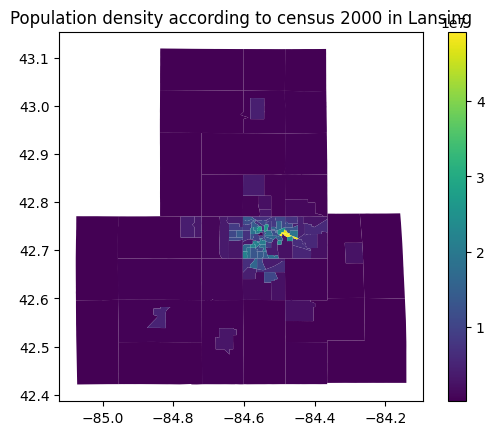

In [57]:
data1.plot(column="pop_density",cmap="viridis", legend=True)
plt.title("Population density according to census 2000 in Lansing")

# We will discuss the types of data structures that is included in geospatial data. 
-   Vector data
-   Raster data 


##[Vector data](https://carpentries-incubator.github.io/geospatial-python/02-intro-vector-data/)  

-   Shape files:  
    - .shp file stores the feature geometry itself
    - .shx is a positional index of the feature geometry to allow quickly searching forwards and backwards the geographic coordinates of each vertex in the vector.    
    - .dbf contains the tabular attributes for each shape.  
    - .prj file indicates the Coordinate reference system (CRS).  
    - .xml contains the Shapefile metadata.  



##[Raster data](https://carpentries-incubator.github.io/geospatial-python/aio/index.html) 

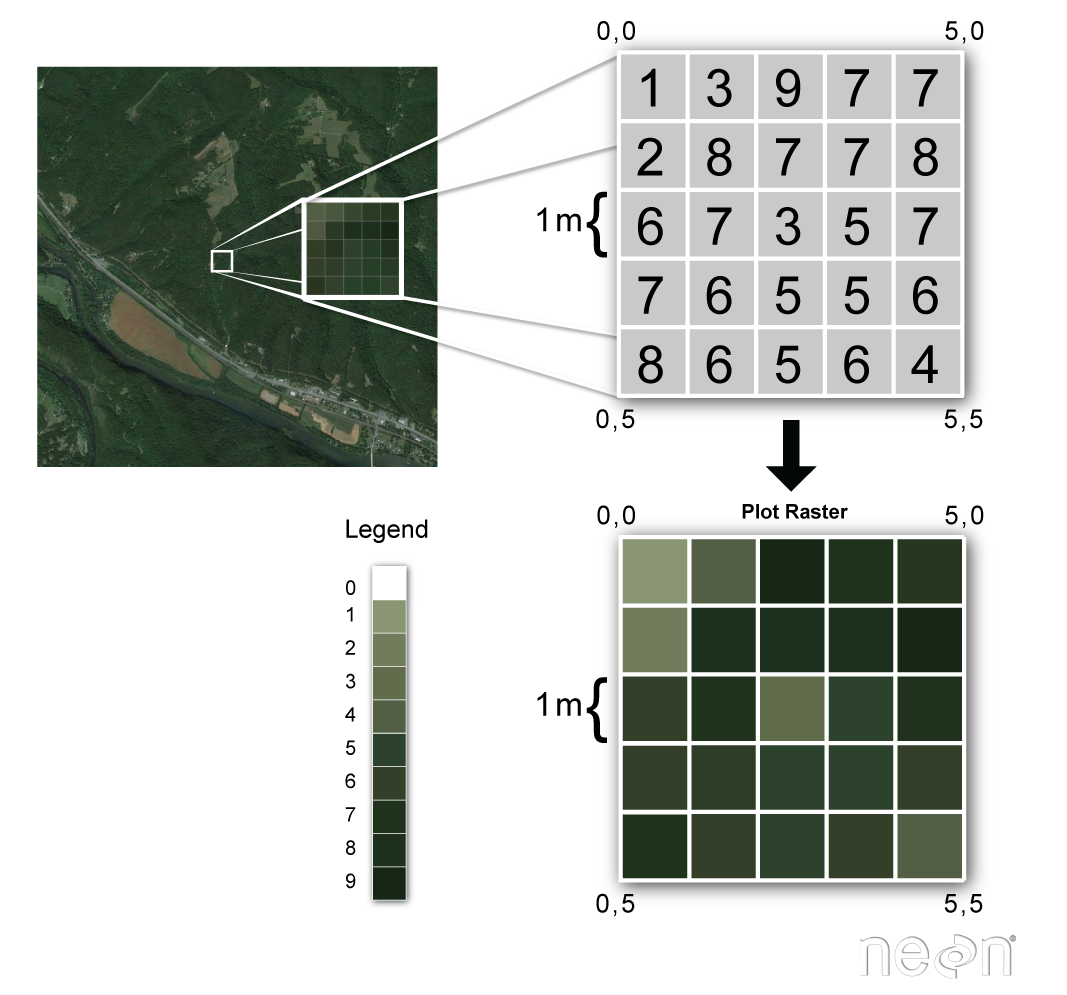  
Source: National Ecological Observatory Network (NEON)  


### SSURGO SOIL Dataset  


`Exercise 3`: Download [SSURGO Soil data](https://websoilsurvey.nrcs.usda.gov/app/WebSoilSurvey.aspx) for your university (or any other area of interest) with a buffer of about 1km. Save it in the same folder as this file.  
-   use this [click2shp](https://apps.gis.ucla.edu/click2shp/#) tool to draw a shape file of your area of interest and export the shapefile into your working folder.  
-   Use the [SSURGO Web Soil Survey](https://websoilsurvey.nrcs.usda.gov/app/) to download the ssurgo data. It will be downloaded in a zip file. Save that again in your  working folder.  



<Axes: >

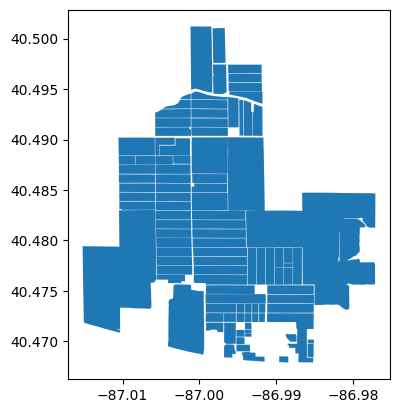

In [7]:
soilAcreShape = gpd.read_file(f"Acre2022_singlepolygon/Acre2022_singlepolygon.shp")
soilAcreShape.plot()

In [9]:
soilAcre = gpd.read_file(f"SSURGO_ACRE_Original/spatial/soilmu_a_aoi.shp")
soilAcre.explore()

In [10]:
soilAcre.head()

,AREASYMBOL,SPATIALVER,MUSYM,MUKEY,geometry
0,IN157,4,Mu,164156,"POLYGON ((-87.01260 40.47259, -87.01267 40.472..."
1,IN157,4,SwA,164315,"POLYGON ((-87.01377 40.47825, -87.01387 40.478..."
2,IN157,4,Mu,164156,"POLYGON ((-87.00889 40.47534, -87.00907 40.475..."
3,IN157,4,Pg,164238,"POLYGON ((-86.99988 40.47260, -87.00000 40.472..."
4,IN157,4,SwA,164315,"POLYGON ((-87.00227 40.46933, -87.00244 40.469..."


In [11]:
muaggat_cols=['musym_1','muname','mustatus','slopegradd','slopegradw','brockdepmi','wtdepannmi','wtdepaprju','flodfreqdc','flodfreqma','pondfreqpr','aws025wta','aws050wta','aws0100wta','aws0150wta','drclassdcd','drclasswet','hydgrpdcd','iccdcd',
              'iccdcdpct','niccdcd','niccdcdpct','engdwobdcd','engdwbdcd','engdwbll','engdwbml','engstafdcd','engstafll','engstafml','engsldcd','engsldcp','englrsdcd','engcmssdcd','engcmssmp','urbrecptdc','urbrecptwt','forpehrtdc','hydclprs','awmmfpwwta','mukey_1']

In [12]:
len(muaggat_cols)

40

In [13]:
component_cols=['comppct_l','comppct_r','comppct_h','compname','compkind','majcompfla','otherph','localphase','slope_l','slope_r','slope_h','slopelenus','slopelen_1','slopelen_2','runoff','tfact','wei','weg','erocl','earthcovki','earthcov_1','hydricon','hydricrati','drainagecl','elev_l','elev_r',
               'elev_h','aspectccwi','aspectrep','aspectcwis','geomdesc','albedodry_','albedodry1','albedodr_1','airtempa_l','airtempa_r','airtempa_h','map_l','map_r','map_h','reannualpr','reannual_1','reannual_2','ffd_l','ffd_r','ffd_h','nirrcapcl','nirrcapscl','nirrcapuni','irrcapcl','irrcapscl',
               'irrcapunit','cropprodin','constreesh','wndbrksuit','rsprod_l','rsprod_r','rsprod_h','foragesuit','wlgrain','wlgrass','wlherbaceo','wlshrub','wlconifero','wlhardwood','wlwetplant','wlshalloww','wlrangelan','wlopenland','wlwoodland','wlwetland','soilslippo','frostact','initsub_l',
               'initsub_r','initsub_h','totalsub_l','totalsub_r','totalsub_h','hydgrp','corcon','corsteel','taxclname','taxorder','taxsuborde','taxgrtgrou','taxsubgrp','taxpartsiz','taxparts_1','taxceactcl','taxreactio','taxtempcl','taxmoistsc','taxtempreg','soiltaxedi','castoriein','flecolcomn',
               'flhe','flphe','flsoilleac','flsoirunof','fltemik2us','fltriumph2','indraingrp','innitratel','misoimgmtg','vasoimgtgr','mukey_12','cokey']

In [14]:
len(component_cols)

109

In [18]:
soil_muaggat = pd.read_csv(r"SSURGO_ACRE_Original/tabular/muaggatt.txt", sep="|", header=None)

In [19]:
soil_muaggat.columns=muaggat_cols
soil_muaggat.head()


,musym_1,muname,mustatus,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,flodfreqma,...,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdc,urbrecptwt,forpehrtdc,hydclprs,awmmfpwwta,mukey_1
0,Cm,Chalmers silty clay loam,NaN,0.5,0.5,NaN,15.0,15.0,NaN,NaN,...,Very limited,Very limited,Poor,Poor,Very limited,1.000,Slight,100,1.0,163904
1,CwB2,"Crosby-Miami silt loams, 2 to 4 percent slopes...",NaN,2.0,2.6,NaN,15.0,76.0,NaN,NaN,...,Very limited,Very limited,Poor,Poor,Very limited,0.687,Slight,3,1.0,163926
2,Du,Drummer soils,NaN,0.5,0.5,NaN,15.0,15.0,NaN,NaN,...,Very limited,Very limited,Poor,Poor,Very limited,1.000,Slight,100,1.0,163953
3,Md,Mahalasville-Treaty complex,NaN,0.5,0.5,NaN,15.0,15.0,NaN,NaN,...,Very limited,Very limited,Fair,Fair,Very limited,1.000,Slight,100,1.0,164115
4,MsC2,"Miami silt loam, 6 to 12 percent slopes, eroded",NaN,8.0,7.3,NaN,76.0,76.0,NaN,NaN,...,Very limited,Somewhat limited,Poor,Poor,Somewhat limited,0.141,Moderate,5,1.0,164148


In [20]:
soil_muaggat.shape, soilAcre.shape

((16, 40), (563, 5))

In [21]:
soilAcre.MUKEY.unique()

array(['164156', '164315', '164238', '164324', '164115', '164275',
       '164327', '164263', '163953', '163926', '163904', '164362',
       '164240', '164148', '164338', '164300'], dtype=object)

In [23]:
soil_comp = pd.read_csv(r"SSURGO_ACRE_Original/tabular/comp.txt", sep="|", header=None)

In [24]:
soil_comp.columns=component_cols
soil_comp.head()

,comppct_l,comppct_r,comppct_h,compname,compkind,majcompfla,otherph,localphase,slope_l,slope_r,...,flsoilleac,flsoirunof,fltemik2us,fltriumph2,indraingrp,innitratel,misoimgmtg,vasoimgtgr,mukey_12,cokey
0,NaN,100,NaN,Chalmers,Series,Yes,DRAINED,NaN,0.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163904,22552851
1,60.0,64,80.0,Crosby,Taxadjunct,Yes,NaN,eroded,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163926,22552793
2,0.0,3,5.0,Treaty,Series,No,NaN,drained,0.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163926,22552794
3,20.0,33,35.0,Miami,Series,Yes,NaN,eroded,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163926,22552795
4,NaN,70,NaN,Drummer,Series,Yes,"DRAINED, MAAT>50",NaN,0.0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163953,22552764


In [25]:
soil_comp.shape , soil_muaggat.shape, soilAcre.shape

((33, 109), (16, 40), (563, 5))

In [26]:
soilAcre.MUKEY.unique()

array(['164156', '164315', '164238', '164324', '164115', '164275',
       '164327', '164263', '163953', '163926', '163904', '164362',
       '164240', '164148', '164338', '164300'], dtype=object)

In [27]:
dict_drclasswet=pd.Series(soil_muaggat.drclasswet.values,index=soil_muaggat.mukey_1.astype(str)).to_dict()
soilAcre["drclasswet"]=soilAcre["MUKEY"].map(dict_drclasswet)

In [28]:
dict_drclasswet

{'163904': 'Poorly drained',
 '163926': 'Somewhat poorly drained',
 '163953': 'Poorly drained',
 '164115': 'Poorly drained',
 '164148': 'Moderately well drained',
 '164156': 'Very poorly drained',
 '164238': 'Poorly drained',
 '164240': 'Very poorly drained',
 '164263': 'Somewhat poorly drained',
 '164275': 'Moderately well drained',
 '164300': 'Very poorly drained',
 '164315': 'Somewhat poorly drained',
 '164324': 'Moderately well drained',
 '164327': 'Somewhat poorly drained',
 '164338': 'Moderately well drained',
 '164362': 'Very poorly drained'}

In [29]:
soilAcre.head()

,AREASYMBOL,SPATIALVER,MUSYM,MUKEY,geometry,drclasswet
0,IN157,4,Mu,164156,"POLYGON ((-87.01260 40.47259, -87.01267 40.472...",Very poorly drained
1,IN157,4,SwA,164315,"POLYGON ((-87.01377 40.47825, -87.01387 40.478...",Somewhat poorly drained
2,IN157,4,Mu,164156,"POLYGON ((-87.00889 40.47534, -87.00907 40.475...",Very poorly drained
3,IN157,4,Pg,164238,"POLYGON ((-86.99988 40.47260, -87.00000 40.472...",Poorly drained
4,IN157,4,SwA,164315,"POLYGON ((-87.00227 40.46933, -87.00244 40.469...",Somewhat poorly drained


Text(0.5, 1.0, 'drainage class in Acre')

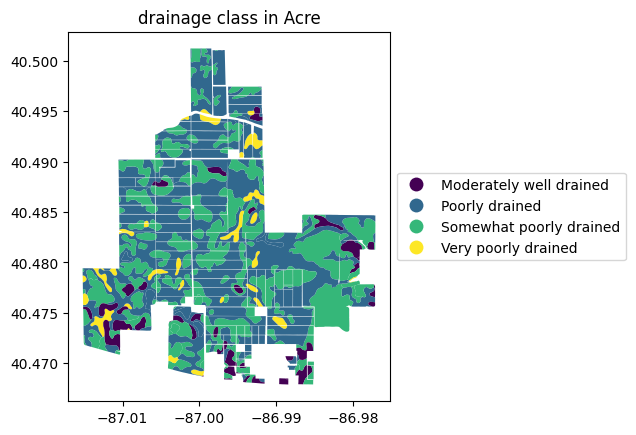

In [30]:

ax=soilAcre.plot(column="drclasswet",cmap="viridis", legend=True,legend_kwds={"fmt": "{:.1f}", "loc": "center left","bbox_to_anchor": (1, 0.5),})
plt.title("drainage class in Acre")


In [31]:
soilAcre.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

(array([-87.02 , -87.015, -87.01 , -87.005, -87.   , -86.995, -86.99 ,
        -86.985, -86.98 , -86.975]),
 [Text(-87.02, 0, '−87.020'),
  Text(-87.015, 0, '−87.015'),
  Text(-87.00999999999999, 0, '−87.010'),
  Text(-87.005, 0, '−87.005'),
  Text(-87.0, 0, '−87.000'),
  Text(-86.99499999999999, 0, '−86.995'),
  Text(-86.99, 0, '−86.990'),
  Text(-86.985, 0, '−86.985'),
  Text(-86.97999999999999, 0, '−86.980'),
  Text(-86.975, 0, '−86.975')])

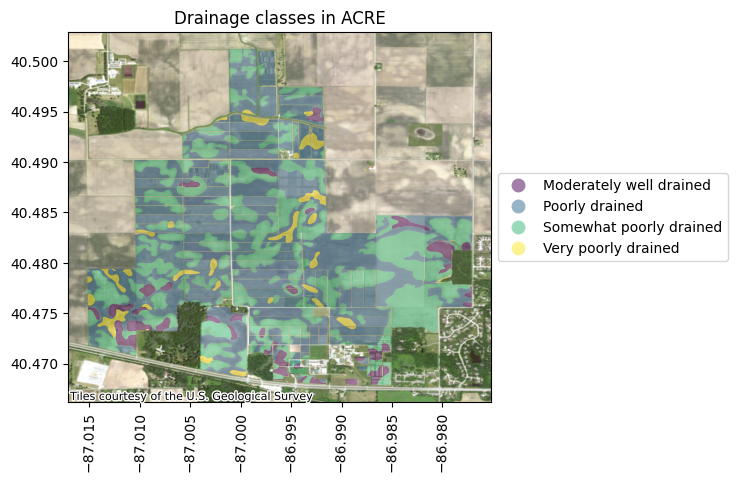

In [32]:
ax = soilAcre.plot(column="drclasswet",cmap="viridis", alpha=0.5, legend=True,legend_kwds={"fmt": "{:.1f}", "loc": "center left","bbox_to_anchor": (1, 0.5),})
cx.add_basemap(ax, crs=soilAcre.crs,
               source=cx.providers.USGS.USImagery)
ax.set_title("Drainage classes in ACRE")
plt.xticks(rotation=89)

`Exercise 4`: Merge the component table to the **soilmu_a_aoi.shp** shape file from your ssurgo data and plot a suitable column name for choropleth plotting. Save the fig in your working folder. We will upload it into the exercise folder in the google drive and discuss the inference from students about their plot.

`Exercise 5`: Calculate the plot area under each drainage class and then sort it by the area. Use colormap to show the difference in area.

# 3D Lidar Elevation Data from USGS  
You can access the 3DEP USGS data from the [NationalMap](https://apps.nationalmap.gov/downloader/) downloader hosted by USGS.  
Use the shapefile you build from click2shp to download lidar data.

In [34]:
output_tif=r"AcreMerged_4326crs.tif"
imgAcreMergedUSGS = rasterio.open(output_tif)
imgAcreMergedUSGS.crs
show(imgAcreMergedUSGS)


RasterioIOError: AcreMerged_4326crs.tif: No such file or directory

In [ ]:
print(imgAcreMergedUSGS.count)
horizontal_resolution=(imgAcreMergedUSGS.bounds.right- imgAcreMergedUSGS.bounds.left)/imgAcreMergedUSGS.width
print("resolution of lidar file", horizontal_resolution)
horizontal_resolution_North=(imgAcreMergedUSGS.bounds.top- imgAcreMergedUSGS.bounds.bottom)/imgAcreMergedUSGS.height

imgAcreMergedUSGS.bounds

In [ ]:
imgAcreMergedUSGS.crs

In [127]:
import rasterio
from rasterio.mask import mask


inshp = "Acre2022_singlepolygon\Acre2022_singlepolygon.shp"
inRas = "AcreMerged_4326crs.tif"
# outRas = 'AcreMerged_4326crs_croppedLidar.tif'


Vector=gpd.read_file(inshp)



with rasterio.open(inRas) as src:
    Vector=Vector.to_crs(src.crs)
    # print(Vector.crs)
    out_image, out_transform=mask(src,Vector.geometry,crop=True)
    out_meta=src.meta.copy() # copy the metadata of the source DEM
    
out_meta.update({
    "driver":"Gtiff",
    "height":out_image.shape[1], # height starts with shape[1]
    "width":out_image.shape[2], # width starts with shape[2]
    "transform":out_transform
})
              
with rasterio.open(outRas,'w',**out_meta) as dst:
    dst.write(out_image)

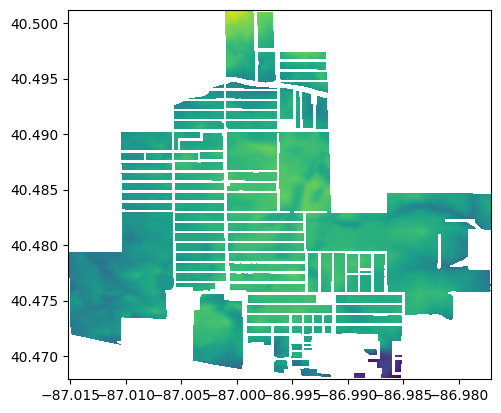

<Axes: >

In [82]:
output_tif=r"AcreMerged_4326crs_croppedLidar.tif"
imgAcreMergedUSGSClipped = rasterio.open(output_tif)
imgAcreMergedUSGSClipped.crs
show(imgAcreMergedUSGSClipped)




In [83]:
xmin,ymin= (float(soilAcreShape.bounds.minx),float(soilAcreShape.bounds.miny))
xmax,ymax= (float(soilAcreShape.bounds.maxx),float(soilAcreShape.bounds.maxy))

C:\Users\jha16\AppData\Local\Temp\ipykernel_8808\2660283268.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  xmin,ymin= (float(soilAcreShape.bounds.minx),float(soilAcreShape.bounds.miny))
C:\Users\jha16\AppData\Local\Temp\ipykernel_8808\2660283268.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  xmax,ymax= (float(soilAcreShape.bounds.maxx),float(soilAcreShape.bounds.maxy))


In [84]:
step=horizontal_resolution*10

<Axes: >

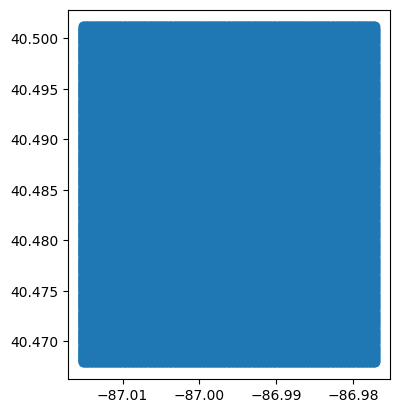

In [88]:
xcoords = [i for i in np.arange(xmin, xmax, step)]
ycoords = [i for i in np.arange(ymin, ymax, step)]

pointcoords = np.array(np.meshgrid(xcoords, ycoords)).T.reshape(-1,2) #A 2D array like [[x1,y1], [x1,y2], ...
points = gpd.points_from_xy(x=pointcoords[:,0], y=pointcoords[:,1])
grid = gpd.GeoSeries(points, crs=imgAcreMergedUSGSClipped.crs)
ptsgdf= gpd.GeoDataFrame(geometry=gpd.GeoSeries(grid))
ptsgdf.plot()

In [89]:
ptsgdf.head()


,geometry
0,POINT (-87.01520 40.46791)
1,POINT (-87.01520 40.46801)
2,POINT (-87.01520 40.46812)
3,POINT (-87.01520 40.46822)
4,POINT (-87.01520 40.46833)


In [179]:
coord_list = [(x,y) for x,y in zip(ptsgdf["geometry"].x , ptsgdf["geometry"].y)]

In [180]:
ptsgdf["elevation"]= [x for x in imgAcreMergedUSGS.sample(coord_list)]
ptsgdf["elevation(m)"]=ptsgdf["elevation"].astype(float)#*0.3048 #convert USfoot to m for jinha data
ptsgdf_clipped=gpd.clip(ptsgdf, soilAcreShape)

ptsgdf_clipped.head()

,geometry,elevation,elevation(m)
36266,POINT (-87.00323 40.46938),[214.4954],214.495407
35630,POINT (-87.00344 40.46938),[214.62775],214.627747
35948,POINT (-87.00334 40.46938),[214.5801],214.580093
35631,POINT (-87.00344 40.46948),[214.6663],214.666306
36267,POINT (-87.00323 40.46948),[214.54797],214.547974


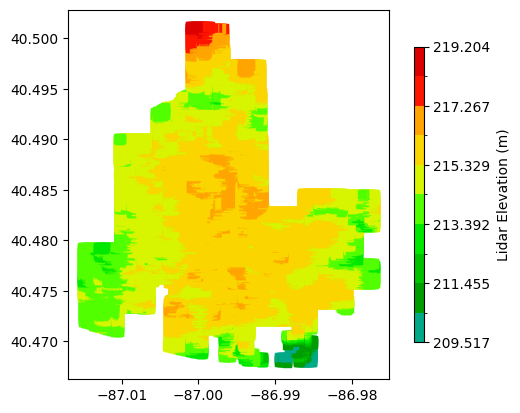

In [181]:

import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
hfont = {'fontname':'Times New Roman'}


# make a colormap that has land and ocean clearly delineated and of the
# same length (256 + 256)
# colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))
bins=10
bin_interval=bins+1
colors_land = plt.cm.nipy_spectral(np.linspace(0.40, 0.9, bin_interval))
#  all_colors = np.vstack((colors_undersea, colors_land))
terrain_map = colors.LinearSegmentedColormap.from_list(
    'terrain_map', colors_land)


rm = colors.TwoSlopeNorm(vmin=ptsgdf_clipped["elevation(m)"].min(), vcenter=ptsgdf_clipped["elevation(m)"].mean() , vmax=ptsgdf_clipped["elevation(m)"].max())

#change this normalization to histogram nbin size variable using discrete bounds 

#even bounds using histogram bins
bounds = np.linspace(ptsgdf_clipped["elevation(m)"].min(), ptsgdf_clipped["elevation(m)"].max(), bin_interval)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
myax = ptsgdf_clipped.plot(column=ptsgdf_clipped["elevation(m)"], alpha=1,norm=norm, marker="s", cmap=terrain_map, legend=True,legend_kwds={"label": "Lidar Elevation (m)","fmt": "{:.1f}", "orientation": "vertical", 'shrink':0.8, 'aspect':30})


`Exercise 6`: create a comparison map with 5 bin numbers and compare the results.

In [185]:
def plotBins(bin):
    import contextily as ctx
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    hfont = {'fontname':'Times New Roman'}
    # make a colormap that has land and ocean clearly delineated and of the
    # same length (256 + 256)
    # colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))

    bins=bin
    bin_interval=bins+1
    colors_land = plt.cm.nipy_spectral(np.linspace(0.40, 0.9, bin_interval))
    #  all_colors = np.vstack((colors_undersea, colors_land))
    terrain_map = colors.LinearSegmentedColormap.from_list(
        'terrain_map', colors_land)


    rm = colors.TwoSlopeNorm(vmin=ptsgdf_clipped["elevation(m)"].min(), vcenter=ptsgdf_clipped["elevation(m)"].mean() , vmax=ptsgdf_clipped["elevation(m)"].max())

    #change this normalization to histogram nbin size variable using discrete bounds 

    #even bounds using histogram bins
    bounds = np.linspace(ptsgdf["elevation(m)"].min(), ptsgdf["elevation(m)"].max(), bin_interval)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    myax = ptsgdf_clipped.plot(column=ptsgdf_clipped["elevation(m)"], alpha=1,norm=norm, marker="s", cmap=terrain_map, legend=True,legend_kwds={"label": "Lidar Elevation (m)","fmt": "{:.1f}", "orientation": "vertical", 'shrink':0.8, 'aspect':30})
    plt.title("Elevation colormap with "+str(bins)+ " ranges (bins) in Acre")

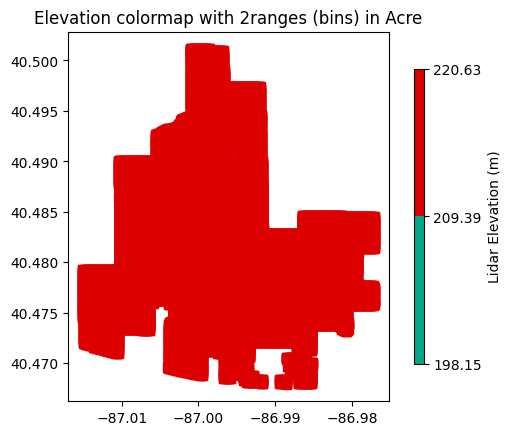

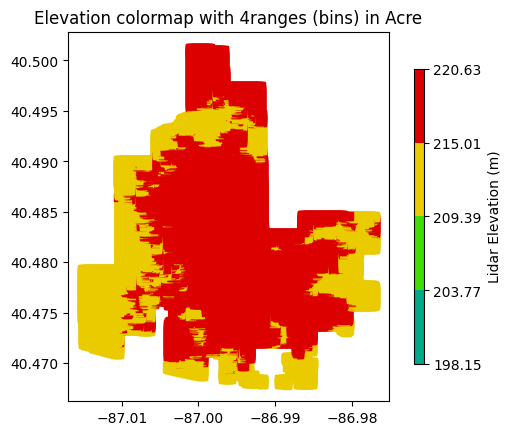

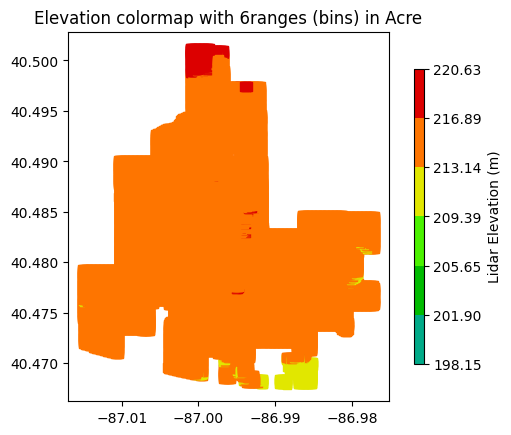

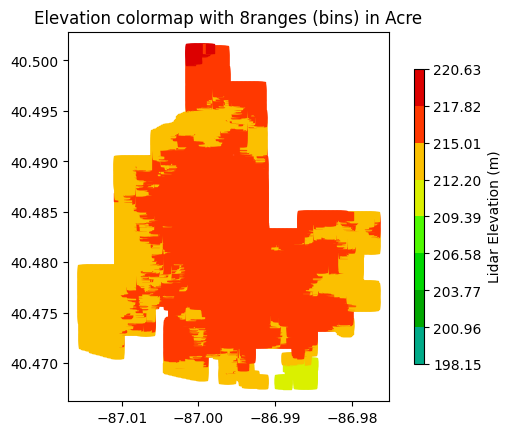

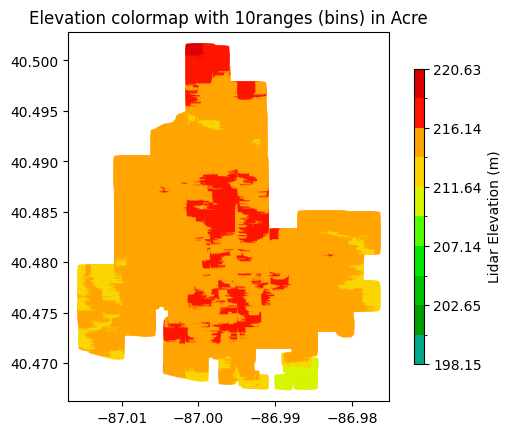

In [187]:
binList=[2,4,6,8,10]
for bin in binList:
    plotBins(bin)